In [19]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import style

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [21]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [22]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [23]:
#  3. Convert the June temperatures to a list.
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [24]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_jun = pd.DataFrame(results_june, columns=['date','June Temps'])

In [25]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_jun.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [26]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_december = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [27]:
# 7. Convert the December temperatures to a list.
results_december = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [28]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(results_december, columns=['date','December Temps'])

In [29]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# D3. Bonus queries for report

(0.0, 400.0)

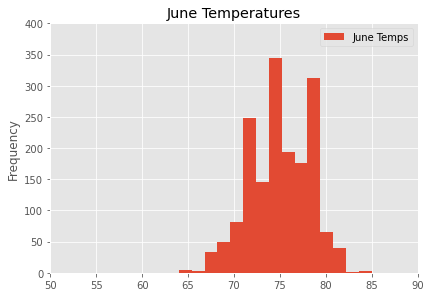

In [45]:
df_jun.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([50, 90])
plt.ylim([0,400])

(0.0, 400.0)

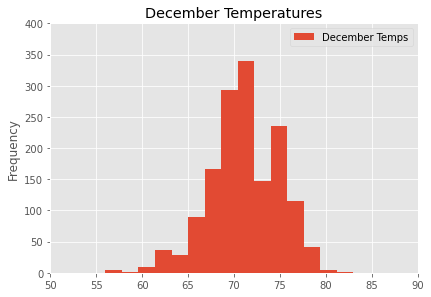

In [31]:
df_dec.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([50, 90])
plt.ylim([0,400])

In [32]:
# precipitation june
results_jun_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
df_jun_prcp = pd.DataFrame(results_jun_prcp, columns=['date','Jun prcp'])
df_jun_prcp.describe()

,Jun prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [33]:
# precipitation december
results_dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
df_dec_prcp = pd.DataFrame(results_dec_prcp, columns=['date','Dec prcp'])
df_dec_prcp.describe()

,Dec prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [34]:
# precipitation per year in the month of june
df_jun_prcp_index = df_jun_prcp.set_index(df_jun_prcp['date'], inplace=False)
df_jun_prcp_index = df_jun_prcp_index.sort_index()
df_jun_prcp_index.index = pd.to_datetime(df_jun_prcp_index.index)
df_jun_prcp_index_year = df_jun_prcp_index.resample("Y").mean()
df_jun_prcp_index_year

,Jun prcp
date,
2010-12-31,0.042241
2011-12-31,0.240142
2012-12-31,0.097062
2013-12-31,0.144195
2014-12-31,0.124372
2015-12-31,0.125160
2016-12-31,0.212312
2017-12-31,0.120000


In [35]:
# precipitation per year in the month of december
df_dec_prcp_index = df_dec_prcp.set_index(df_dec_prcp['date'], inplace=False)
df_dec_prcp_index = df_dec_prcp_index.sort_index()
df_dec_prcp_index.index = pd.to_datetime(df_dec_prcp_index.index)
df_dec_prcp_index_year = df_dec_prcp_index.resample("Y").mean()
df_dec_prcp_index_year

,Dec prcp
date,
2010-12-31,0.459087
2011-12-31,0.201581
2012-12-31,0.089604
2013-12-31,0.169014
2014-12-31,0.188439
2015-12-31,0.169506
2016-12-31,0.199494


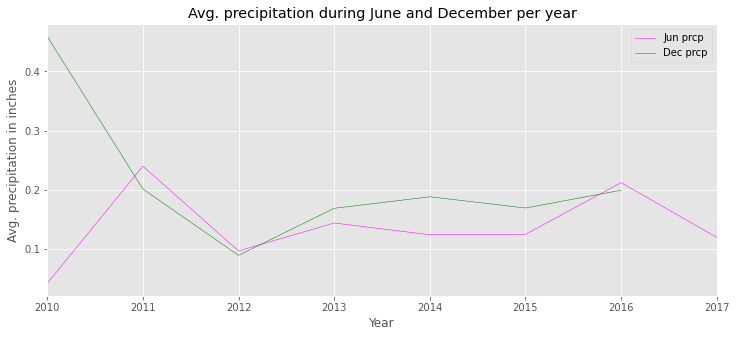

In [40]:
# precipitations during June and December per year
style.use('ggplot')
ax = df_jun_prcp_index_year.plot(c='magenta', linewidth=0.5)
df_dec_prcp_index_year.plot(ax=ax, c='green', figsize=(12, 5), linewidth=0.5)

#Labels
ax.set_xlabel('Year')
ax.set_ylabel("Avg. precipitation in inches")
ax.set_title("Avg. precipitation during June and December per year")

#Ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Plot the legend
lgnd = plt.legend(fontsize="10", mode="Expanded",loc="best")
lgnd.get_title().set_fontsize(12)
plt.show()